#Handwritten digit recognition
Handwritten digit recognition is a classic pattern recognition problem and a fundamental use case in machine learning. This project explores how to classify digits (0–9) from the scikit-learn digits dataset, which consists of 8×8 grayscale images represented as 64-pixel numerical features.

To handle the high dimensionality and improve both interpretability and training efficiency, Principal Component Analysis (PCA) is applied to reduce the feature space while retaining most of the data variance. Following this, a Support Vector Machine (SVM) classifier is trained on the transformed feature space to learn the decision boundaries between digit classes.

This pipeline highlights how dimensionality reduction and a well-tuned classification model can together achieve high accuracy on real-world numerical image data.

# visualize the main dataset

In [ ]:
import pandas as pd
from sklearn.datasets import load_digits

digits = load_digits()
X,y = digits.data, digits.target

digits_df = pd.DataFrame(X)
digits_df['label']=y

digits_df.head(100)

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,11.0,16.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,16.0,15.0,0.0,0.0,6
96,0.0,1.0,9.0,16.0,15.0,10.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,11.0,16.0,8.0,0.0,0.0,0.0,8
97,0.0,0.0,0.0,3.0,14.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,7.0,0.0,0.0,4
98,0.0,2.0,15.0,16.0,16.0,13.0,2.0,0.0,0.0,1.0,...,0.0,0.0,2.0,15.0,16.0,14.0,5.0,0.0,0.0,3


#Printing first 5 images

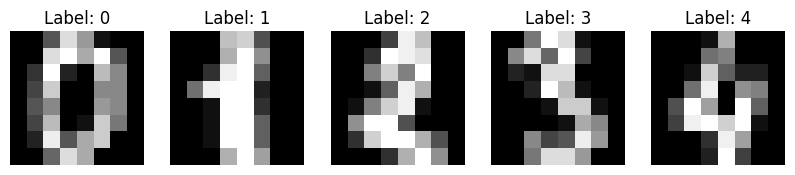

In [ ]:

import matplotlib.pyplot as plt



# Display first 5 images with labels
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Label: {digits.target[i]}')
    plt.axis('off')


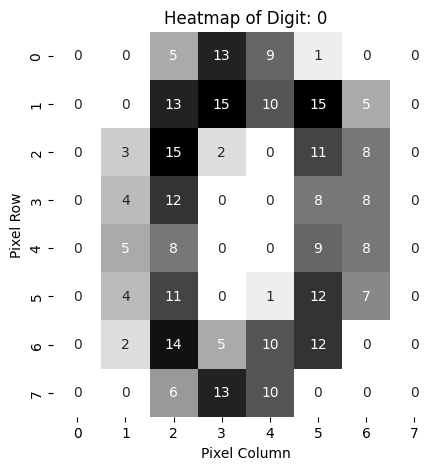

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits

# Load data
digits = load_digits()

# Pick one sample (e.g., index 0)
image = digits.images[0]
label = digits.target[0]

# Plot image with pixel values
plt.figure(figsize=(6, 5))
sns.heatmap(image, annot=True, cmap='gray_r', cbar=False, square=True, fmt='.0f')
plt.title(f'Heatmap of Digit: {label}')
plt.xlabel('Pixel Column')
plt.ylabel('Pixel Row')
plt.show()

# Feature Scaling


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[ 0.         -0.33501649 -0.04308102 ... -1.14664746 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  0.54856067 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -1.09493684 ...  1.56568555  1.6951369
  -0.19600752]
 ...
 [ 0.         -0.33501649 -0.88456568 ... -0.12952258 -0.5056698
  -0.19600752]
 [ 0.         -0.33501649 -0.67419451 ...  0.8876023  -0.5056698
  -0.19600752]
 [ 0.         -0.33501649  1.00877481 ...  0.8876023  -0.26113572
  -0.19600752]]


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=42,stratify=y)


#Train the SVM model

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train,y_train)

SVC()

# Evaluate Performance

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  1  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  1  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  1  0 35  0  0]
 [ 0  2  0  0  1  0  0  0 32  0]
 [ 0  0  0  0  0  0  1  2  0 33]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.95      0.97      0.96        36
           5       0.97      1.00      0.99        37
           6       0.97      1.00      0.99        36
           7       0.92      0.97      0.95        36
           8       1.00      0.91      0.96        35
           9       1.00      0.92      0.96        36

    accuracy                           0.97       360
   macro avg       

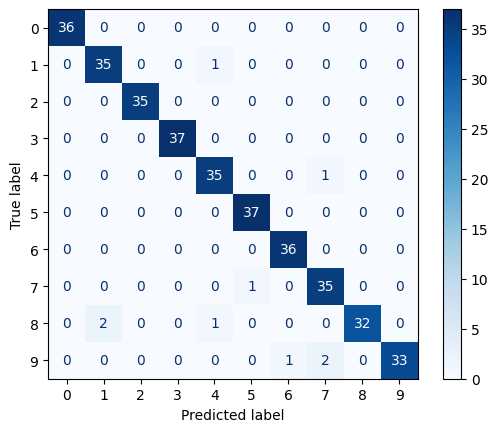

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

y_pred = svm_model.predict(X_test)
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap='Blues')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


#Finding the best model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.001],
    'kernel': ['rbf']
}

# Setup grid search
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


#Evaluating Best Model

[[36  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  1  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 37  0  0  0  0  0  0]
 [ 0  0  0  0 35  0  0  1  0  0]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 36  0  0  0]
 [ 0  0  0  0  0  1  0 35  0  0]
 [ 0  2  0  0  1  0  0  0 32  0]
 [ 0  0  0  0  0  0  1  2  0 33]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.95      0.97      0.96        36
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        37
           4       0.95      0.97      0.96        36
           5       0.97      1.00      0.99        37
           6       0.97      1.00      0.99        36
           7       0.92      0.97      0.95        36
           8       1.00      0.91      0.96        35
           9       1.00      0.92      0.96        36

    accuracy                           0.97       360
   macro avg       

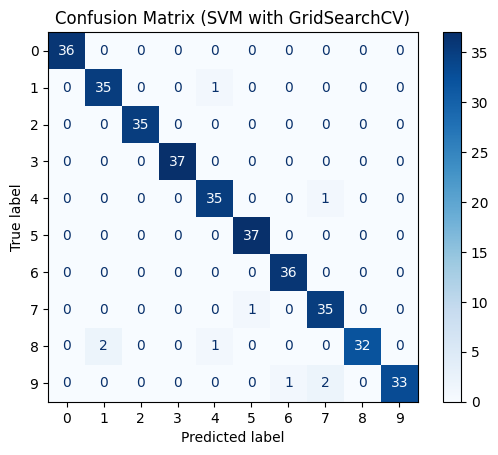

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict with best model
y_pred = grid.predict(X_test)

# Show metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(grid, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix (SVM with GridSearchCV)")
plt.show()


#Implementing Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(n_jobs=1,max_features='sqrt')

param_grid = {
    "n_estimators":[10,100,500,1000],
    "max_depth":[1,5,10,15],
    "min_samples_leaf":[1,2,3,10,15,30,50]
}

grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid,cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [1, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 3, 10, 15, 30, 50],
                         'n_estimators': [10, 100, 500, 1000]})

In [ ]:
print(grid_search.best_params_,grid_search.best_estimator_)

{'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 500} RandomForestClassifier(max_depth=15, n_estimators=500, n_jobs=1)
